j-platpatにて発明･考案の名称/タイトルを無人搬送車とし、日付指定を20000101～20240502とした。
国内文献が731件ヒットし、csv出力した結果が特実_国内文献.csvである。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

# CSVファイル読み込み
df = pd.read_csv("特実_国内文献.csv")

# 出願年を抽出
df["出願年"] = pd.to_datetime(df["出願日"]).dt.year

# 年ごとの出願件数集計
df_grouped = df.groupby("出願年")["文献番号"].count().reset_index()
df_grouped.columns = ["出願年", "出願件数"]

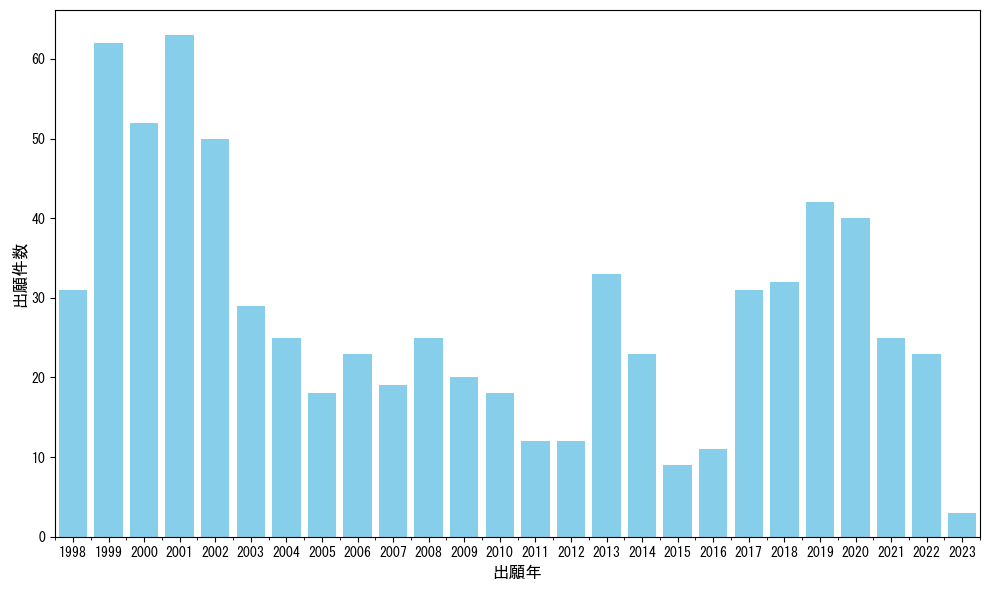

In [95]:


# グラフ作成
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(df_grouped["出願年"], df_grouped["出願件数"], color='skyblue')

# 軸ラベルとタイトル設定
plt.xlabel("出願年", fontsize=12)
plt.ylabel("出願件数", fontsize=12)

# グリッド線と目盛設定
# ax.grid(True)
major_locator = MultipleLocator(1)
minor_locator = MultipleLocator(0.5)
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_minor_locator(minor_locator)

# 日本語表示設定
plt.rcParams['font.family'] = 'MS Gothic'
plt.tick_params(labelsize=10)

# 横軸ラベルの範囲設定
ax.set_xlim(df_grouped["出願年"].min()-0.5, df_grouped["出願年"].max()+0.5)

# グラフ表示
plt.tight_layout()
plt.show()

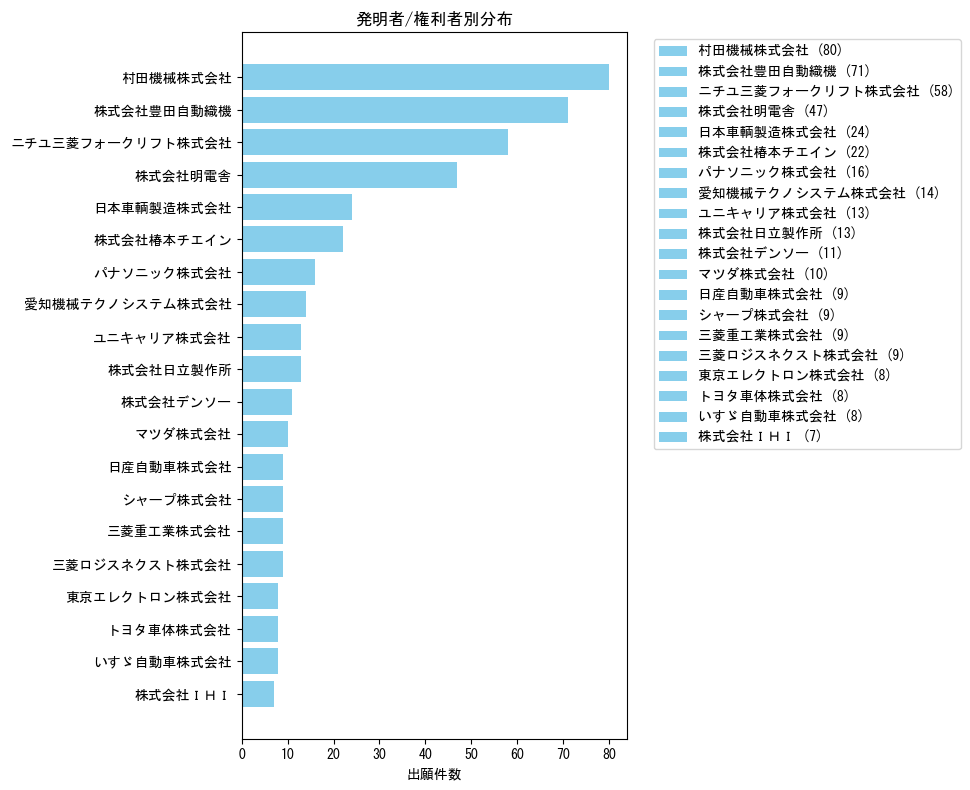

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイル読み込み
# df = pd.read_csv("特実_国内文献.csv")

# 発明者/権利者リストを作成
inventors = df["出願人/権利者"].unique()

# 発明者/権利者ごとの出願件数を集計
inventor_counts = []
for inventor in inventors:
    inventor_counts.append(
    (inventor, df[df["出願人/権利者"] == inventor]["文献番号"].count()))

# ソート
inventor_counts = sorted(inventor_counts, key=lambda x: x[1], reverse=False)  # 出願件数で降順ソート

# グラフ作成
plt.figure(figsize=(10, 8))
bars = plt.barh(
    [inventor[0] for inventor in inventor_counts[-20:]],  # 上位10件のみ表示
    [inventor[1] for inventor in inventor_counts[-20:]],
    color='skyblue',
    label=[f"{inventor[0]} ({inventor[1]})" for inventor in reversed(inventor_counts[-20:])]  # 棒ラベルに数字を表示
)

# 凡例を表示
# plt.legend(loc="lower right")  # 凡例の位置を右上に変更
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 凡例の位置を右上に変更

plt.xlabel("出願件数")
plt.title("発明者/権利者別分布")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [145]:
import matplotlib.pyplot as plt
import pandas as pd

# CSV ファイル読み込み
df = pd.read_csv("特実_国内文献.csv")

# 出願年を列に追加
df["出願年"] = pd.to_datetime(df["出願日"]).dt.year

# 発明者/権利者ごとの一年ごとの出願件数を集計
inventor_counts = df.groupby(
    ["出願人/権利者", "出願年"])["文献番号"].count().unstack().fillna(0)  # NaN値を0で置き換える

# 累計出願数を計算
inventor_counts_sum = inventor_counts.sum(axis=1)

# 上位20の発明者/権利者を取得
top_inventors = inventor_counts_sum.nlargest(20).index.tolist()


In [151]:
# 不明なキーを削除
inventor_counts.drop(index=inventor_counts.index[~inventor_counts.index.isin(
    top_inventors)], inplace=True)

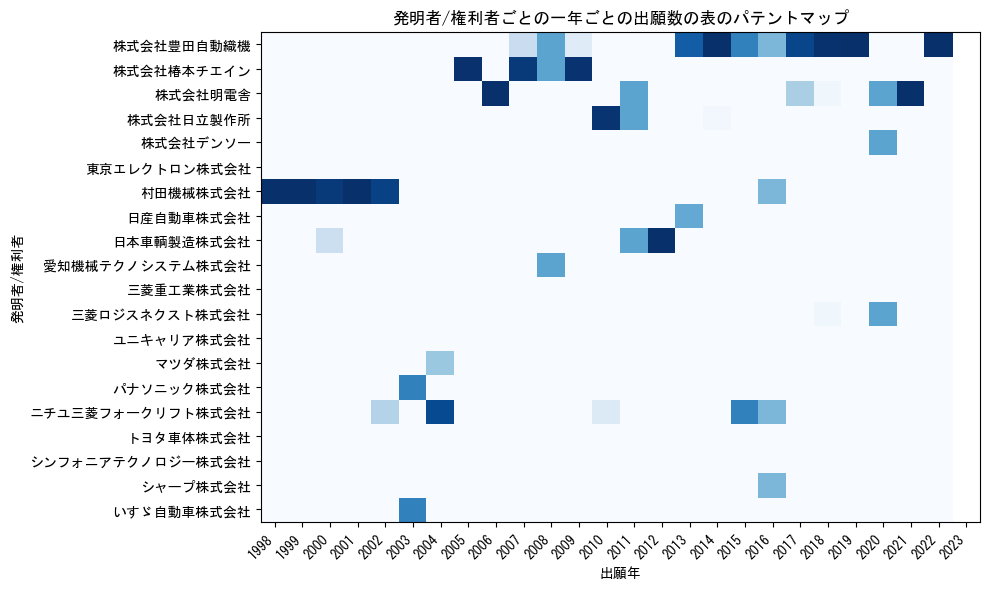

In [168]:

# # カラーマップを変更する
# cmap = 'Greys'  # 連続的なカラーマップではなく、離散的なカラーマップを使用する

# データを正規化する
inventor_counts = (inventor_counts - inventor_counts.mean()
                            ) / inventor_counts.std()

# カラーマップを変更する
cmap = 'Greys'  # 連続的なカラーマップではなく、離散的なカラーマップを使用する

# 閾値を設定する
threshold = 0.1
inventor_counts[inventor_counts < threshold] = 0

# 発明者/権利者名のリストを作成
inventor_names = inventor_counts.columns.tolist()
# 発明者/権利者番号を作成
inventor_numbers = range(len(inventor_names))

# サブプロットを作成
fig, ax = plt.subplots(figsize=(10, 6))

# 軸ラベルを設定
ax.set_xlabel("出願年")
ax.set_ylabel("発明者/権利者")

# パテントマップの作成
cmap = plt.cm.Blues  # 他のカラーマップに変更することもできます
vmin = inventor_counts.min().min()
vmax = inventor_counts.max().max()
ax.pcolor(inventor_counts, cmap=cmap, vmin=vmin, vmax=vmax) # 修正

# ax.pcolor(inventor_counts, cmap=cmap) ## original

# 凡例を作成
# plt.colorbar(label="出願件数")


# 軸の目印を設定
# ax.set_xticks(range(len(inventor_names)))
# ax.set_xticks(range(len(inventor_numbers)))
# ax.set_yticks(range(len(inventor_counts.index)))
ax.set_xticks([i + 0.5 for i in range(len(inventor_numbers))])
ax.set_yticks([i + 0.5 for i in range(len(inventor_counts.index))])

# 軸の目印のラベルを設定
# ax.set_xticklabels(range(len(inventor_numbers)), inventor_names, rotation=45, ha="right")
ax.set_xticklabels(inventor_names, rotation=45, ha="right")
ax.set_yticklabels(inventor_counts.index)

# グラフのタイトルを設定
plt.title("発明者/権利者ごとの一年ごとの出願数の表のパテントマップ")

# グラフを表示
plt.tight_layout()
plt.show()

<Axes: xlabel='出願日'>

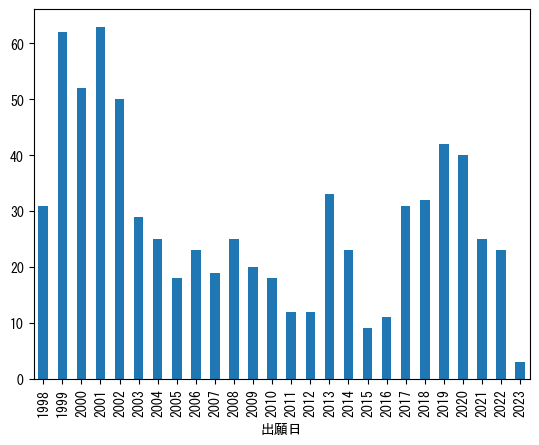

In [97]:
import pandas as pd

# CSVファイル読み込み
df = pd.read_csv("特実_国内文献.csv")

# 必要な列のデータ型を変更
df["出願日"] = pd.to_datetime(df["出願日"])  # 日付列をdatetime型に変換
df["公知日"] = pd.to_datetime(df["公知日"])
# その他の数値列があれば同様に変換

# グラフ作成
# 例: 出願日ごとの出願件数をプロット
df.groupby(df["出願日"].dt.year)["文献番号"].count().plot(kind="bar")

<Axes: ylabel='出願人/権利者'>

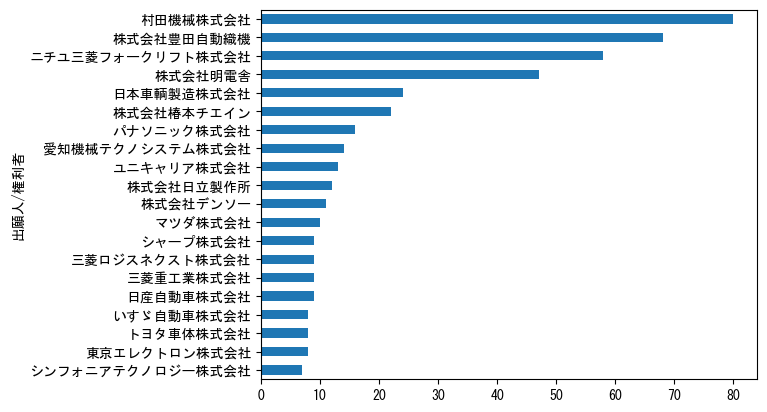

In [98]:
# 不要な列を削除
# df = df.drop(columns=["文献番号", "出願番号", "その他"])

# 出願人/権利者ごとに公開番号の数をカウントし、上位20件を取得
top_applicants = df.groupby("出願人/権利者")["公開番号"].count().nlargest(20)
top_applicants = top_applicants[::-1]
# 上位20件の出願人/権利者に関連する公開番号の数を棒グラフでプロット
top_applicants.plot(kind="barh")